# Boundary Layer Height Estimation

This script gets pulls Data (Currently GFS, Will add NARR once I figure it out) data from nomads.ncdc.noaa.gov/ via ftp over a specified date range

### It uses NCL (NCAR Command Language) https://www.ncl.ucar.edu/Download/ to convert .grib2 files to .nc4 (NetCDF4) http://unidata.github.io/netcdf4-python/#netCDF4.Variable

### Then it estimates the BL heights at your location based off the average of the (#9) closet gridpoints

In [24]:
import pandas as pd
import numpy as np
import shlex, subprocess


from netCDF4 import Dataset
ftproot = "ftp://nomads.ncdc.noaa.gov/GFS/analysis_only/"
tail = '_000.grb2'
Data_file = 'QuickData_FI.csv'
Data = pd.read_csv(Data_file,delimiter = ',',header = 0)
Data = Data.set_index(pd.DatetimeIndex(Data.datetime))
Data['PBLH'] = np.nan

def Extract_Data(file):
    file = file.split('/')[-1:][0].split('.grb2')[0]+'.nc4'
    with Dataset(file, "a") as Data:
        BL = Data.variables['UGRD_P0_L220_GLL0'][:]
        Lat = Data.variables['lat_0'][:]
        Lon = Data.variables['lon_0'][:]
    Command = "sudo rm -rf "+ file
    args = shlex.split(Command)
    p = subprocess.Popen(args)
    p.wait()
#     print(BL)
    return(BL,Lat,Lon)
#     print(file)

def Get_Data(file):
    Command = """wget --user="anonymous" --password="thruhikerflash@gmail.com" """
    Command = Command+ file
    args = shlex.split(Command)
    p = subprocess.Popen(args)
    p.wait()
    filename = file.split('/')[-1:][0]
    Command = "ncl_convert2nc "+ filename+" -nc4c"
    args = shlex.split(Command)
    
    p = subprocess.Popen(args)
    p.wait()

    Command = "sudo rm -rf "+ filename
    args = shlex.split(Command)
    p = subprocess.Popen(args)
    p.wait()
    return(Extract_Data(file))
#     print(args)
    

Files = []
for i in Data.index:
    ky = str(i.year)
    mo = str(i.month)
    if i.month < 10:
        mo = '0'+mo
    dy = str(i.day)
    if i.day < 10:
        dy = '0'+dy
    ky1 = ky + mo
    ky2 = ky + mo+ dy
    hr = str(i.hour)+'00'
    if i.hour < 10:
        hr = '0'+hr
    if i.hour%6 == 0:
        Files.append(ftproot+ky1+'/'+ky2+'/gfsanl_4_'+ky2+'_'+hr+tail)
BL,Lat,Lon = Get_Data(Files[-1])
print(BL.shape,Lat.shape,Lon.shape)
# for f in Files:
#     temp = Get_Data(f)
#     print(temp)

(361, 720) (361,) (720,)


[ 90.   89.5  89.   88.5  88.   87.5  87.   86.5  86.   85.5  85.   84.5
  84.   83.5  83.   82.5  82.   81.5  81.   80.5  80.   79.5  79.   78.5
  78.   77.5  77.   76.5  76.   75.5  75.   74.5  74.   73.5  73.   72.5
  72.   71.5  71.   70.5  70.   69.5  69.   68.5  68.   67.5  67.   66.5
  66.   65.5  65.   64.5  64.   63.5  63.   62.5  62.   61.5  61.   60.5
  60.   59.5  59.   58.5  58.   57.5  57.   56.5  56.   55.5  55.   54.5
  54.   53.5  53.   52.5  52.   51.5  51.   50.5  50.   49.5  49.   48.5
  48.   47.5  47.   46.5  46.   45.5  45.   44.5  44.   43.5  43.   42.5
  42.   41.5  41.   40.5  40.   39.5  39.   38.5  38.   37.5  37.   36.5
  36.   35.5  35.   34.5  34.   33.5  33.   32.5  32.   31.5  31.   30.5
  30.   29.5  29.   28.5  28.   27.5  27.   26.5  26.   25.5  25.   24.5
  24.   23.5  23.   22.5  22.   21.5  21.   20.5  20.   19.5  19.   18.5
  18.   17.5  17.   16.5  16.   15.5  15.   14.5  14.   13.5  13.   12.5
  12.   11.5  11.   10.5  10.    9.5   9.    8.5   

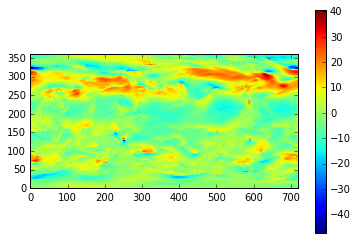

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
print(Lat)
# print(Lat[np.where(Lat >= 68)])
# print(Lon[np.where(Lon >= -134)])
plt.imshow(BL)
plt.ylim(0,360)
plt.colorbar()

In [4]:
import shlex, subprocess
command_line = input()

BashCommand ="""wget --user="anonymous" --password="thruhikerflash@gmail.com" ftp://nomads.ncdc.noaa.gov/GFS/analysis_only/201706/20170601/gfsanl_3_20170601_0000_000.grb2"""


args = shlex.split(BashCommand)
print(args)

p = subprocess.Popen(args) # Success!

kitty
['wget', '--user=anonymous', '--password=thruhikerflash@gmail.com', 'ftp://nomads.ncdc.noaa.gov/GFS/analysis_only/201706/20170601/gfsanl_3_20170601_0000_000.grb2']


In [ ]:
FTPpath="ftp://nomads.ncdc.noaa.gov/GFS/analysis_only/20170%mo/20170%mo01/gfsanl_3_20170601_0000_000.grb2"
# tail="_gdas0p5"
Command = 'wget --user="anonymous" --password="thruhikerflash@gmail.com" '
for m in range (6,10):
    mo = str(m)
    for d in range(0,32):
        if d < 10:
            day = '0'+str(d)
        else:
            day = str(d)
        if (m == 6 and d < 21) == False and (m == 9 and d > 14) == False:
            BashCommand = Command+FTPpath+mo+day+tail
#             print(BashCommand)
print(BashCommand)
BashCommand ="""wget --user="anonymous" --password="thruhikerflash@gmail.com" ftp://nomads.ncdc.noaa.gov/GFS/analysis_only/201706/20170601/gfsanl_3_20170601_0000_000.grb2"""
print(BashCommand.split())
BashCommand = "echo kitty"
import subprocess
process = subprocess.Popen(BashCommand, stdout=subprocess.PIPE)
output, error = process.communicate()  

In [5]:


from netCDF4 import Dataset
rootgrp = Dataset("temp/gfsanl_3_20170601_0000_000.nc4", "a")


In [ ]:
BL = rootgrp.variables['UGRD_P0_L220_GLL0'][:]
print(BL)
# print(rootgrp.varriables)#['lat_0'])
# print(rootgrp['VGRD_P0_L220_GLL0'])
# BL = rootgrp.createVariable()
# print(rootgrp.varriable)
# fcstgrp = rootgrp.createGroup("forecasts")
# analgrp = rootgrp.createGroup("analyses")
# print (rootgrp.groups)

In [ ]:
"""
plot H's and L's on a sea-level pressure map
(uses scipy.ndimage.filters and netcdf4-python)
"""
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from mpl_toolkits.basemap import Basemap, addcyclic
from scipy.ndimage.filters import minimum_filter, maximum_filter
from netCDF4 import Dataset

def extrema(mat,mode='wrap',window=10):
    """find the indices of local extrema (min and max)
    in the input array."""
    mn = minimum_filter(mat, size=window, mode=mode)
    mx = maximum_filter(mat, size=window, mode=mode)
    # (mat == mx) true if pixel is equal to the local max
    # (mat == mn) true if pixel is equal to the local in
    # Return the indices of the maxima, minima
    return np.nonzero(mat == mn), np.nonzero(mat == mx)

# plot 00 UTC today.
date = datetime.now().strftime('%Y%m%d')+'00'
print(date)
date = '2017110900'

# open OpenDAP dataset.
temp = "http://nomads.ncep.noaa.gov:9090/dods/gfs/gfs/%s/gfs_%sz_anl" %\
       (date[0:8],date[8:10])
print(temp)
# "https://nomads.ncdc.noaa.gov/data/gfsanl/200403/20040310/

data=Dataset("https://nomads.ncdc.noaa.gov/data/gfsanl/200404/20040402/gfsanl_3_20040402_0000_000.grb")#"http://nomads.ncep.noaa.gov:9090/dods/gfs_0p25/gfs20171111/gfs_0p25_00z_anl")
    #"http://nomads.ncep.noaa.gov:9090/dods/gfs_0p50/gfs20171109/gfs_0p50_00z")#%\
#         (date[0:8],date[8:10]))



# read lats,lons.
lats = data.variables['lat'][:]
lons1 = data.variables['lon'][:]
print(data.variables)
nlats = len(lats)
nlons = len(lons1)
# read prmsl, convert to hPa (mb).
prmsl = 0.01*data.variables['prmslmsl'][0]
# the window parameter controls the number of highs and lows detected.
# (higher value, fewer highs and lows)
local_min, local_max = extrema(prmsl, mode='wrap', window=50)
# create Basemap instance.
m = Basemap(llcrnrlon=0,llcrnrlat=-80,urcrnrlon=360,urcrnrlat=80,projection='mill')
# add wrap-around point in longitude.
prmsl, lons = addcyclic(prmsl, lons1)
# contour levels
clevs = np.arange(900,1100.,5.)
# find x,y of map projection grid.
lons, lats = np.meshgrid(lons, lats)
x, y = m(lons, lats)
x = x.astype(int)
y = y.astype(int)
print(type(x),y)
# create figure.
fig=plt.figure(figsize=(8,4.5))
ax = fig.add_axes([0.05,0.05,0.9,0.85])
print(m)
cs = m.contour(x,y,prmsl,clevs,colors='k',linewidths=1.)
m.drawcoastlines(linewidth=1.25)
m.fillcontinents(color='0.8')
m.drawparallels(np.arange(-80,81,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(0,360,60),labels=[0,0,0,1])
xlows = x[local_min]; xhighs = x[local_max]
ylows = y[local_min]; yhighs = y[local_max]
lowvals = prmsl[local_min]; highvals = prmsl[local_max]
# plot lows as blue L's, with min pressure value underneath.
xyplotted = []
# don't plot if there is already a L or H within dmin meters.
yoffset = 0.022*(m.ymax-m.ymin)
dmin = yoffset
for x,y,p in zip(xlows, ylows, lowvals):
    if x < m.xmax and x > m.xmin and y < m.ymax and y > m.ymin:
        dist = [np.sqrt((x-x0)**2+(y-y0)**2) for x0,y0 in xyplotted]
        if not dist or min(dist) > dmin:
            plt.text(x,y,'L',fontsize=14,fontweight='bold',
                    ha='center',va='center',color='b')
            plt.text(x,y-yoffset,repr(int(p)),fontsize=9,
                    ha='center',va='top',color='b',
                    bbox = dict(boxstyle="square",ec='None',fc=(1,1,1,0.5)))
            xyplotted.append((x,y))
# plot highs as red H's, with max pressure value underneath.
xyplotted = []
for x,y,p in zip(xhighs, yhighs, highvals):
    if x < m.xmax and x > m.xmin and y < m.ymax and y > m.ymin:
        dist = [np.sqrt((x-x0)**2+(y-y0)**2) for x0,y0 in xyplotted]
        if not dist or min(dist) > dmin:
            plt.text(x,y,'H',fontsize=14,fontweight='bold',
                    ha='center',va='center',color='r')
            plt.text(x,y-yoffset,repr(int(p)),fontsize=9,
                    ha='center',va='top',color='r',
                    bbox = dict(boxstyle="square",ec='None',fc=(1,1,1,0.5)))
            xyplotted.append((x,y))
plt.title('Mean Sea-Level Pressure (with Highs and Lows) %s' % date)
plt.show()

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# set up orthographic map projection with
# perspective of satellite looking down at 50N, 100W.
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# make up some data on a regular lat/lon grid.
nlats = 73; nlons = 145; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])
wave = 0.75*(np.sin(2.*lats)**8*np.cos(4.*lons))
mean = 0.5*np.cos(2.*lats)*((np.sin(2.*lats))**2 + 2.)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons*180./np.pi, lats*180./np.pi)
# contour data over the map.
cs = map.contour(x,y,wave+mean,15,linewidths=1.5)
plt.title('contour lines over filled continent background')
plt.show()